<a href="https://colab.research.google.com/github/mihir3030/google-colab/blob/main/Retail_Mobile_Price_Classification_Using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
a = []
df = pd.DataFrame()

In [ ]:
x_train = pd.read_csv('train.csv')
x_test = pd.read_csv('test.csv')

In [ ]:
x_train

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [ ]:
x_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:
x_test.drop('id', axis=1, inplace=True)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
print(x_train.shape, x_test.shape)

(10999, 12) (1000, 20)


In [ ]:
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
Reached.on.Time_Y.N,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


<AxesSubplot:>

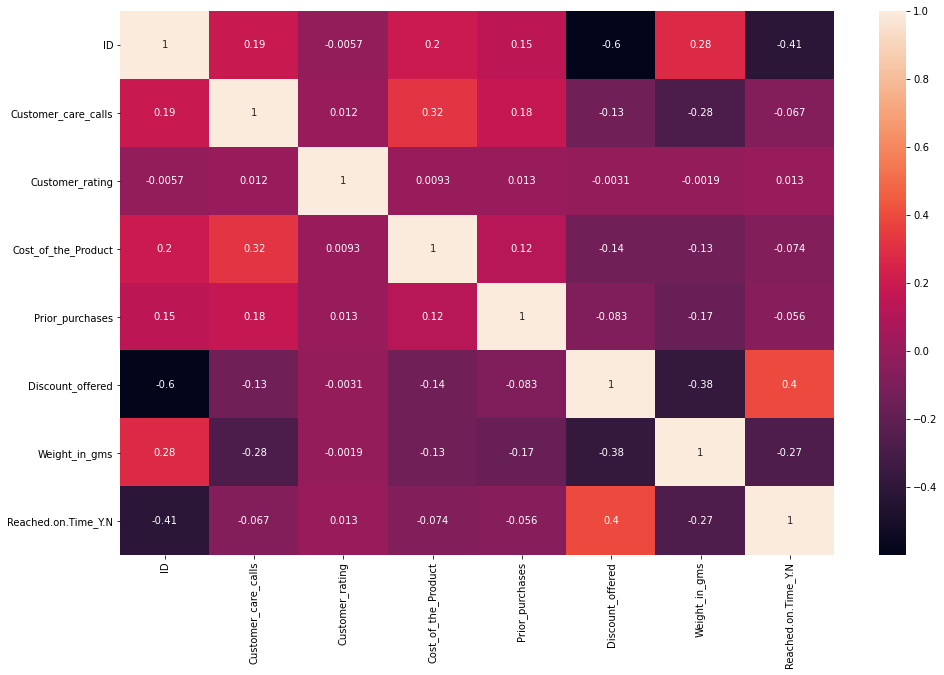

In [ ]:
plt.figure(figsize=(16, 10))
corr = x_train.corr()
sns.heatmap(corr, annot=True)

In [ ]:
y_train = x_train['price_range']

KeyError: 'price_range'

In [ ]:
y_train

NameError: name 'y_train' is not defined

In [ ]:
x_train.drop('price_range', axis=1, inplace=True)

In [ ]:
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [ ]:
x_train.shape

(2000, 20)

In [ ]:
rel = abs(corr)

In [ ]:

rel = rel['price_range'].sort_values(ascending=False)

In [ ]:
rel = rel[1:]

In [ ]:
rel

ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
touch_screen     0.030411
mobile_wt        0.030302
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
clock_speed      0.006606
n_cores          0.004399
m_dep            0.000853
Name: price_range, dtype: float64

In [ ]:
useful_feature = rel[0:9]
useful_feature = useful_feature.index
useful_feature

Index(['ram', 'battery_power', 'px_width', 'px_height', 'int_memory', 'sc_w',
       'pc', 'touch_screen', 'mobile_wt'],
      dtype='object')

In [ ]:
x_train = x_train[useful_feature]
x_test = x_test[useful_feature]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
x_test

array([[ 1.22937276, -0.47545131,  0.39191165, ...,  0.97602599,
         1.        ,  1.53553472],
       [ 1.61464307, -0.94278218, -0.87102753, ...,  0.31943266,
        -1.        ,  1.47811975],
       [ 0.23631323,  1.29207729,  0.28723561, ..., -0.99375401,
         1.        ,  1.33458232],
       ...,
       [-0.84225976, -0.1469316 , -0.94384565, ...,  0.31943266,
        -1.        , -1.7084112 ],
       [ 0.34021668,  0.65817305, -0.92791669, ...,  0.31943266,
         1.        ,  0.90397003],
       [ 0.63353704,  0.04971753, -1.43764349, ...,  1.46847099,
        -1.        ,  0.01403796]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=333)

In [ ]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(1400, 9) (600, 9)
(1400,) (600,)


In [ ]:
y_train = np.array(y_train)
y_train = y_train.reshape(-1,1)

In [ ]:
y_train.shape

(1400, 1)

In [ ]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)

In [ ]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(1400, 9) (600, 9)
(1400, 1) (600, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
hot = OneHotEncoder()

In [ ]:
y_train

array([[2],
       [0],
       [3],
       ...,
       [0],
       [2],
       [1]], dtype=int64)

In [ ]:
y_train = hot.fit_transform(y_train).toarray()

In [ ]:
y_train

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [ ]:
y_test = hot.fit_transform(y_test).toarray()

In [ ]:
y_test

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [ ]:
print(y_train.shape, y_test.shape)

(1400, 4) (600, 4)


In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_test

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [ ]:
name = 'train_dataset'

In [ ]:
tensorboard = TensorBoard(log_dir='mobile_price/{}'.format(name), histogram_freq=1, write_graph=True)

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(units=8, input_shape=(x_train.shape[1],), activation='relu'))
model.add(Dense(units=6, activation='relu'))


In [ ]:
model.add(Dense(units=4, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train, epochs=150, validation_data=(x_test, y_test), batch_size=64, callbacks=[tensorboard])

Epoch 1/150
22/22 [==============================] - 0s 22ms/step - loss: 1.4392 - accuracy: 0.2557 - val_loss: 1.4237 - val_accuracy: 0.2500
Epoch 2/150
22/22 [==============================] - 0s 2ms/step - loss: 1.4100 - accuracy: 0.2571 - val_loss: 1.4012 - val_accuracy: 0.2400
Epoch 3/150
22/22 [==============================] - 0s 2ms/step - loss: 1.3910 - accuracy: 0.2864 - val_loss: 1.3860 - val_accuracy: 0.2950
Epoch 4/150
22/22 [==============================] - 0s 2ms/step - loss: 1.3773 - accuracy: 0.3157 - val_loss: 1.3738 - val_accuracy: 0.3250
Epoch 5/150
22/22 [==============================] - 0s 2ms/step - loss: 1.3650 - accuracy: 0.3321 - val_loss: 1.3621 - val_accuracy: 0.3417
Epoch 6/150
22/22 [==============================] - 0s 2ms/step - loss: 1.3529 - accuracy: 0.3364 - val_loss: 1.3501 - val_accuracy: 0.3550
Epoch 7/150
22/22 [==============================] - 0s 2ms/step - loss: 1.3399 - accuracy: 0.3543 - val_loss: 1.3364 - val_accuracy: 0.3583
Epoch 8/150


Epoch 56/150
22/22 [==============================] - 0s 2ms/step - loss: 0.1830 - accuracy: 0.9536 - val_loss: 0.1978 - val_accuracy: 0.9500
Epoch 57/150
22/22 [==============================] - 0s 2ms/step - loss: 0.1781 - accuracy: 0.9564 - val_loss: 0.1931 - val_accuracy: 0.9450
Epoch 58/150
22/22 [==============================] - 0s 2ms/step - loss: 0.1747 - accuracy: 0.9579 - val_loss: 0.1881 - val_accuracy: 0.9467
Epoch 59/150
22/22 [==============================] - 0s 2ms/step - loss: 0.1709 - accuracy: 0.9593 - val_loss: 0.1833 - val_accuracy: 0.9483
Epoch 60/150
22/22 [==============================] - 0s 2ms/step - loss: 0.1669 - accuracy: 0.9586 - val_loss: 0.1833 - val_accuracy: 0.9467
Epoch 61/150
22/22 [==============================] - 0s 2ms/step - loss: 0.1629 - accuracy: 0.9629 - val_loss: 0.1756 - val_accuracy: 0.9483
Epoch 62/150
22/22 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9629 - val_loss: 0.1752 - val_accuracy: 0.9483
Epoch 

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
con = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

In [ ]:
con

array([[156,   3,   0,   0],
       [  1, 136,   7,   0],
       [  0,   4, 147,   2],
       [  0,   0,   4, 140]], dtype=int64)

<AxesSubplot:>

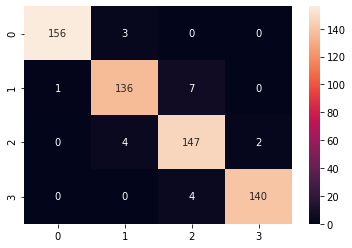

In [ ]:
sns.heatmap(con, annot=True, fmt='g')

In [ ]:
acc = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
acc

0.965

In [ ]:
y_test.argmax(axis=1)

array([0, 3, 0, 2, 3, 2, 1, 0, 0, 1, 1, 3, 1, 1, 0, 3, 1, 2, 0, 2, 2, 2,
       0, 0, 0, 3, 0, 3, 0, 2, 1, 2, 0, 3, 3, 1, 3, 2, 3, 2, 2, 3, 2, 0,
       1, 1, 2, 2, 1, 1, 2, 0, 2, 2, 3, 3, 1, 0, 3, 2, 0, 1, 2, 2, 0, 0,
       0, 2, 1, 2, 0, 0, 2, 2, 0, 3, 2, 2, 2, 0, 0, 0, 3, 3, 1, 2, 1, 3,
       2, 3, 2, 1, 2, 2, 2, 0, 1, 0, 2, 3, 0, 2, 2, 1, 0, 3, 2, 0, 0, 3,
       2, 1, 1, 1, 2, 0, 3, 1, 1, 0, 2, 1, 2, 3, 0, 1, 0, 0, 1, 1, 0, 3,
       1, 3, 0, 2, 2, 0, 1, 2, 2, 2, 3, 0, 3, 0, 3, 2, 2, 2, 0, 1, 3, 0,
       0, 3, 1, 2, 0, 3, 0, 2, 3, 1, 1, 1, 2, 3, 2, 2, 1, 3, 2, 1, 1, 1,
       0, 1, 3, 1, 3, 3, 3, 0, 1, 1, 0, 3, 0, 1, 0, 1, 1, 1, 0, 0, 3, 3,
       0, 2, 3, 1, 2, 3, 0, 3, 0, 3, 0, 2, 2, 2, 3, 1, 2, 1, 3, 3, 0, 3,
       2, 1, 2, 0, 3, 0, 0, 1, 3, 2, 2, 1, 2, 1, 1, 3, 0, 3, 2, 1, 3, 1,
       3, 3, 0, 1, 1, 0, 0, 3, 2, 1, 1, 0, 3, 2, 3, 2, 1, 3, 0, 0, 0, 2,
       1, 1, 0, 2, 2, 2, 2, 1, 3, 3, 0, 2, 0, 2, 3, 2, 0, 1, 1, 1, 3, 0,
       0, 0, 3, 1, 1, 2, 0, 1, 1, 2, 0, 1, 3, 1, 3,

In [ ]:
y_test.argmax(axis=1)[1]

3

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x = x_train.drop('')